## COVID-19 Data 

Use of [public Covid-19 in GitHub](https://github.com/CSSEGISandData/COVID-19) data from: 
[Center for Systems Science and Engineering (CSSE)](https://systems.jhu.edu/)

Here we present some useful functions if you want to visualize COVID-19 worldwide data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 
import glob

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [26]:
##=== Creating plot and log plot from data
def info_plot(df, Countries): 
    #Input: DataFrame and list with countries name as strings
    
    df = df.groupby("Country/Region").sum()
    df.drop(['Lat', 'Long'], axis=1, inplace=True)
    
    fig = plt.figure(figsize=(10, 6))
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)
    
    for c in Countries:
        Cases = df.loc[c][df.loc[c] > 0]
        
        if Cases.empty:
            continue
        
        num = len(Cases)
        X = np.arange(0, num)
        
        ax0.plot(X, df.loc[c][-num:], label='{}'.format(c))
        ax1.semilogy(X, df.loc[c][-num:], label='{}'.format(c))
        
    ax0.set_xlabel("days"); ax1.set_xlabel("days")
    ax0.set_ylabel("counts"); ax1.set_ylabel("counts")
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    return True

In [27]:
##=== Getting data manually 

Cc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
Dc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
Rc = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

Confirmed Cases


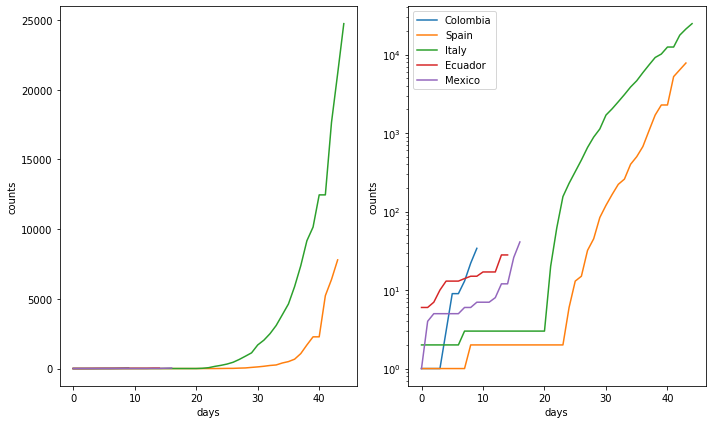

Deaths


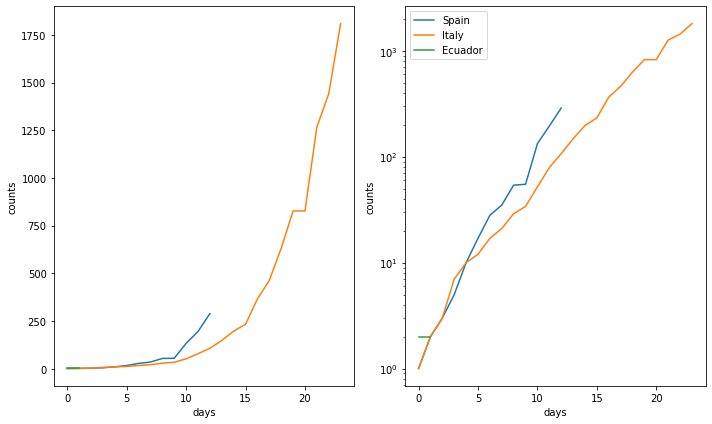

Recovered


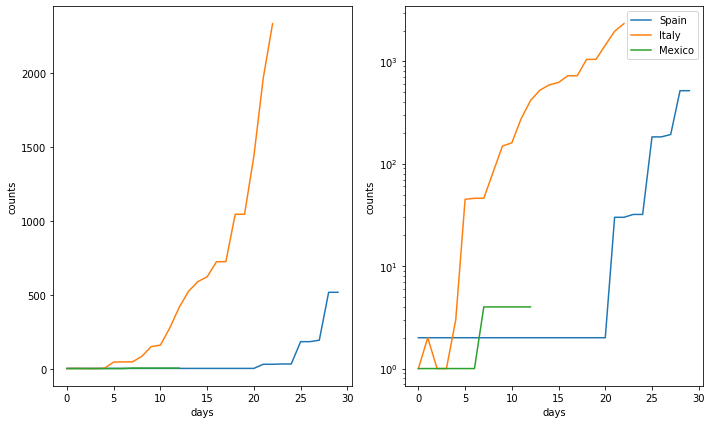

True

In [28]:
##=== Trying first graphic

country = ["Colombia", "Spain", "Italy", "Ecuador", "Mexico"]

print("Confirmed Cases")
info_plot(Cc, country)

print("Deaths")
info_plot(Dc, country)

print("Recovered")
info_plot(Rc, country)